In [3]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import shapefile as shp
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Parameters
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh_path = '/albedo/work/user/pscholz/mesh_fesom2.0/core2_srt_dep@node/'
save_path = None # '~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= None #5 # set None --> take path as in input_paths otherwise add dir of cycle
which_mode= 'vprofile'

#_____________________________________________________________________________________
input_paths= list()
# input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke+idemix_jayne_bin_ck0.1/5/')
# input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke+idemix_nycander_bin_ck0.1/')
# input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke+idemix_stormtide_bin_ck0.1/')
input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke_ctrl_ck0.1/5/')

input_names= list()
# input_names.append('TKE+IDEMIX, jayne')
# input_names.append('TKE+IDEMIX, nycander')
# input_names.append('TKE+IDEMIX, stormtide')
input_names.append('TKE')

vname     = 'salt'
year      = [1979,2019]
mon, day, record, box, depth = None, None, None, None, None

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None # 'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
box_regions = list()
box_regions.append('ocean_basins/Arctic_Basin.shp')
box_regions.append('ocean_basins/Eurasian_Basin.shp')
box_regions.append('mpas_region/Canada_Basin.shp')
box_regions.append('mpas_region/North_Atlantic_Ocean.shp')
box_regions.append('mpas_region/Greenland_Sea.shp')
box_regions.append('mpas_region/Irminger_Sea.shp')
box_regions.append('mpas_region/Norwegian_Sea.shp')
box_regions.append('mpas_region/Labrador_Sea.shp')
# box_regions.append('mpas_region/North_Pacific_Ocean.shp')
# box_regions.append('mpas_region/South_Pacific_Ocean.shp')
box_regions.append('mpas_region/Southern_Ocean.shp')
box_regions.append('mpas_region/Western_Weddell_Sea.shp')

#_____________________________________________________________________________________
do_clim   = True
which_clim= 'phc3'
clim_path = '/albedo/work/projects/p_fesom/FROM-OLLIE/FESOM2/hydrography/phc3.0/phc3.0_annual.nc'

#_____________________________________________________________________________________
ncolumn   = 3 
do_rescale= None
do_rescale= 'log10'
which_dpi = 300

In [5]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True)

#______________________________________________________________________________________________________
if (which_cycl is not None) and (which_cycl is not "None"): 
    for ii,ipath in enumerate(input_paths):
        input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
        print(ii, input_paths[ii])

    if (ref_path is not None) and (ref_path is not "None"): 
        ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
        print('R', ref_path)

#______________________________________________________________________________________________________
# in case of diff plots
if (ref_path is not None) and (ref_path is not "None"): 
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record
        
#________________________________________________________________________________________________________
# define index regions --> reading shape files
box = list()
shp_path = os.path.join(tpv.__path__[0],'shapefiles/')
for region in box_regions:
    if region is 'global' or isinstance(region,list): box.append(region)
    else: box.append(shp.Reader(os.path.join(shp_path,region)))      
print(box)

#______________________________________________________________________________________________________    
# concatenate list = list1+list2
if (ref_path is not None) and (ref_path is not "None"): 
    if isinstance(ref_path, list): 
        input_paths, input_names = ref_path + input_paths, ref_name + input_names
    else:    
        input_paths, input_names = list([ref_path]) + input_paths, list([ref_name]) + input_names
        
#________________________________________________________________________________________________________
# setup colors for different lines
#which_cmap = 'gist_ncar'
# which_cmap = 'nipy_spectral'
#colors = plt.get_cmap(which_cmap)(np.linspace(0.1,0.9,len(input_paths)))
#categcmap = matplotlib.colors.ListedColormap(colors)

 > found *.pckl file: /albedo/work/user/pscholz/mesh_fesom2.0/core2_srt_dep@node
 > load  *.pckl file: tripyview_fesom2_core2_srt_dep@node_focus0.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node
 > id              = core2_srt_dep@node
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, False
 > do narea,nresol = True, False
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
[<shapefile.Reader object at 0x7fe99dd77310>, <shapefile.Reader object at 0x7fe99dd77350>, <shapefile.Reader object at 0x7fe9a0ff8a90>, <shapefile.Reader object at 0x7fe9a0ff8510>, <shapefile.Reader object at 0x7fe9a0ff8e10>, <shapefile.Reader object at 0x7fe99dd5fdd0>, <shapefile.Reader object at 0x7fe99dd5fc10>, <sh

In [6]:
#________________________________________________________________________________________________________
# allocate lists
lw_min,lw_max = 0.5, 1.5
list_index  = list()
list_labels = list()
list_lcolor = list()
list_lwidth = list()
list_lstyle = list()

#___APPEND ABS CLIMATOLOGY_____________________________________________________________________________    
if (vname in ['temp', 'salt', 'pdens'] or 'sigma' in vname) and do_clim and  (ref_path is None): 
    clim_vname= vname
    if   vname=='temp' and  which_clim.lower()=='woa18': clim_vname = 't00an1'
    elif vname=='salt' and  which_clim.lower()=='woa18': clim_vname = 's00an1'
    clim = tpv.load_climatology(mesh, clim_path, clim_vname)
    list_index.append(tpv.load_index_fesom2(mesh, clim, box))
    list_labels.append(which_clim.upper())
    list_lcolor.append('k')
    list_lwidth.append(lw_max)
    list_lstyle.append([])
    
#___LOAD FESOM2 DATA___________________________________________________________________________________
for ii, (datapath, descript) in enumerate(zip(input_paths, input_names)):
    print(ii, datapath, descript)
    #__________________________________________________________________________________________________
    yeari, moni, dayi, recordi = year, mon, day, record
    if (ii==0) and (ref_path != None and ref_path != 'None'): yeari, moni, dayi, recordi = year_ref, mon_ref, day_ref, record_ref
    
    #__________________________________________________________________________________________________
    data       = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=yeari, mon=moni, descript=descript , do_info=False, do_zarithm=None)
    
    #__________________________________________________________________________________________________    
    # create reference data if given 
    if (ii==0) and (ref_path != None and ref_path != 'None'):
        data_ref = tpv.load_index_fesom2(mesh, data_ref, box) 
        # plotting zero reference line
        ref_index  = list()    
        for ii, idx in enumerate(data_ref):
            ref_index.append(idx.copy())
            idx_vname = list(idx.keys())
            ref_index[ii][vname].data = np.zeros((len(ref_index[ii][vname].data), ))
        list_index.append(ref_index)
        list_labels.append(descript)
        list_lcolor.append('k')
        list_lwidth.append(lw_max)
        list_lstyle.append([])   
        continue
        
    #__________________________________________________________________________________________________    
    data_index = tpv.load_index_fesom2(mesh, data, box)
    if  (ref_path != None and ref_path != 'None'): 
        list_index.append(tpv.do_indexanomaly(data_index, data_ref))
        list_labels.append(data_index[0][vname].attrs['descript']+'-'+data_ref[0][vname].attrs['descript'])
    else:
        list_index.append(data_index)
        list_labels.append(data[vname].attrs['descript'])
    list_lcolor.append([])
    list_lwidth.append(lw_max)
    list_lstyle.append([])    
if  (ref_path != None and ref_path != 'None'): del(data_ref)

0 /albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke_ctrl_ck0.1/5/ TKE


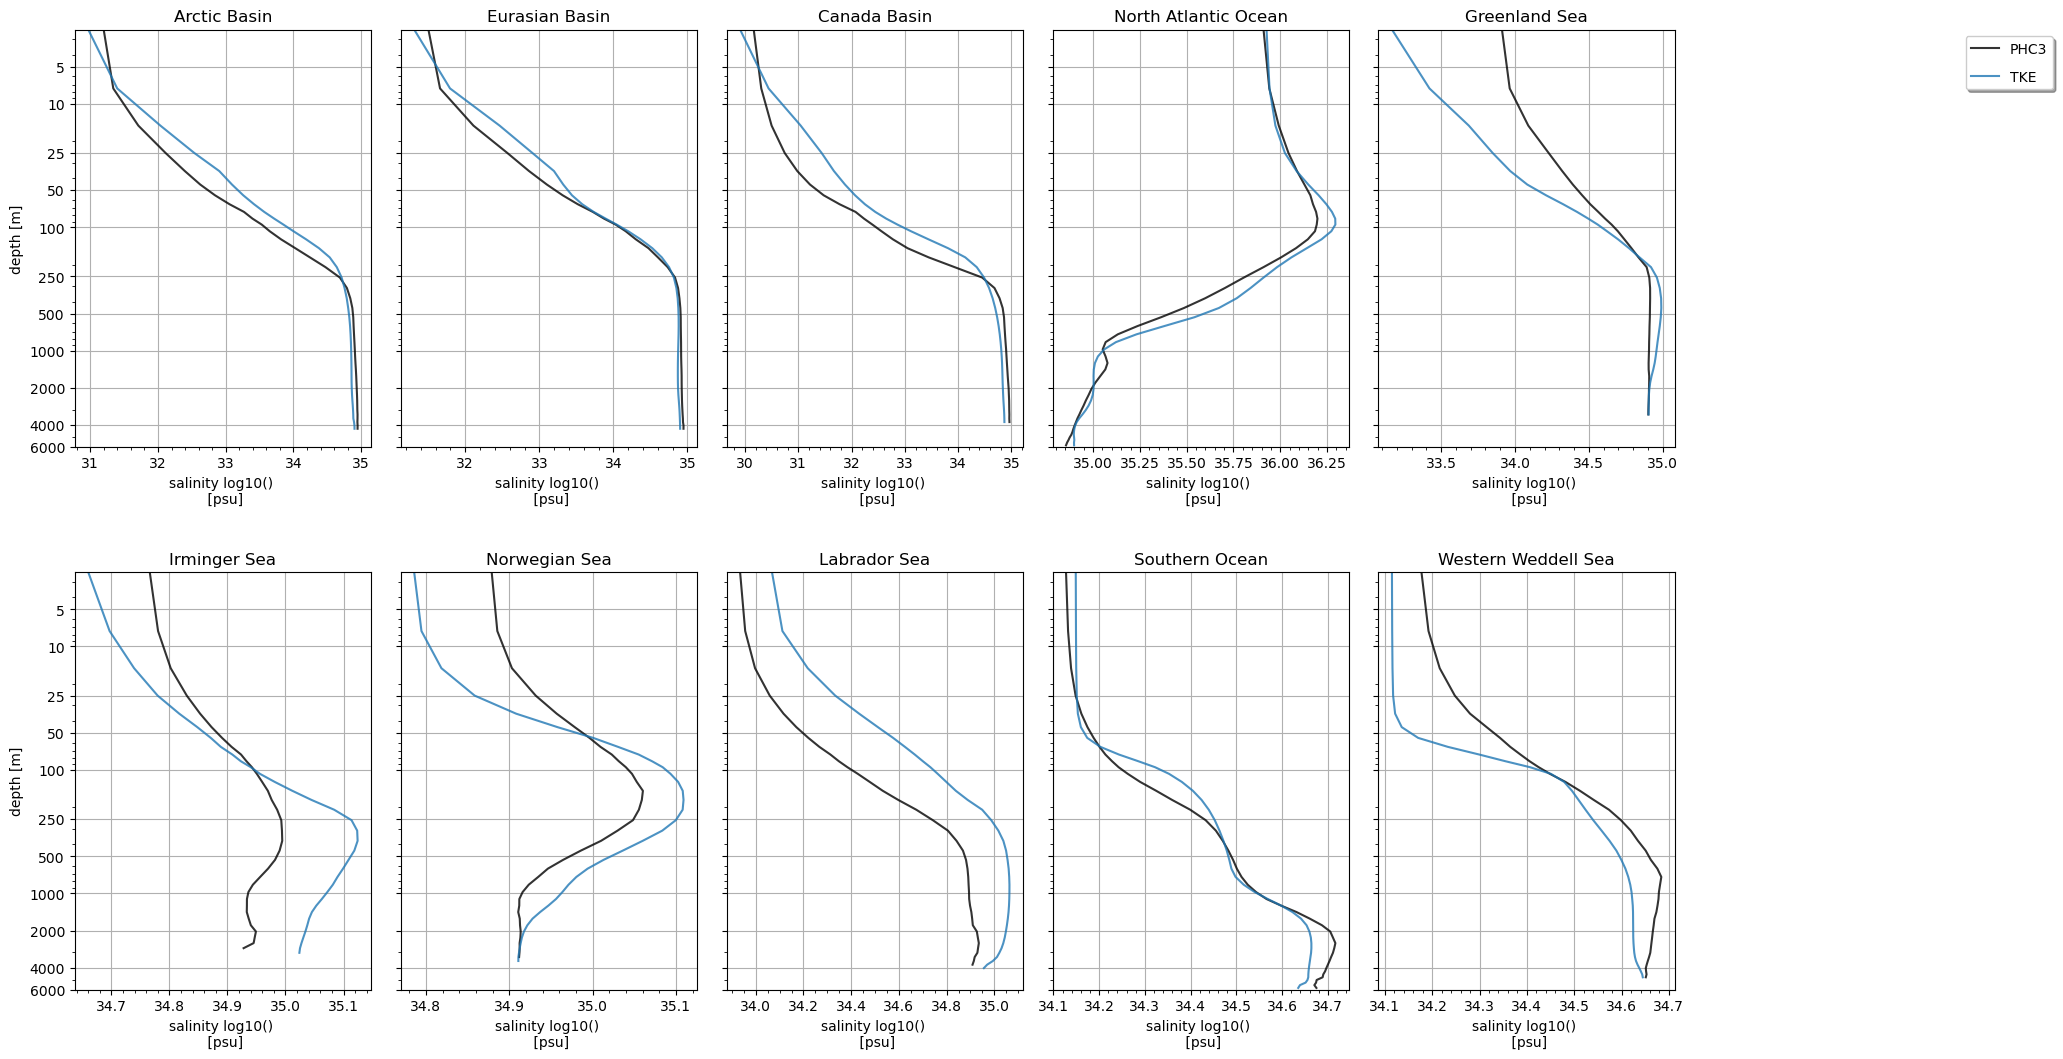

In [7]:
#___PLOT FESOM2 DATA___________________________________________________________________________________
spath  = save_path
sname  = vname
slabel = list_index[-1][0][sname].attrs['str_lsave']
if spath is not None: spath  = '{}/{}_{}_{}.png'.format(spath, which_mode, sname, slabel) 
nrow   = 2 
if save_fname is not None: spath = save_fname
fig, ax = tpv.plot_index_z(list_index,
                       list_labels,
                       box, figsize=[20,12], n_rc=[nrow,np.ceil(len(box)/nrow).astype(int)], # n_rc=[3,4],
                       linecolor_list=list_lcolor,
                       linestyle_list=list_lstyle,
                       linewidth = list_lwidth,
                       do_save=spath,
                       do_rescale = do_rescale,    
                      )  